# Moore-Penrose pseudo inverse


In [231]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.


In [232]:
def my_pinv1(A):
    Sinv = np.zeros(A.T.shape)
    U, s, VT = np.linalg.svd(A, full_matrices=True)
    np.fill_diagonal(Sinv, 1 / s)
    return VT.T @ Sinv @ U.T

In [233]:
def his_pinv(A):
    U, s, VT = np.linalg.svd(A, full_matrices=True)
    s[s != 0] = 1 / s[s != 0]
    return VT.T @ la.diagsvd(s, A.shape[1], A.shape[0]) @ U.T

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.


In [234]:
def my_pinv2(A):
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    return VT.T @ np.diag(1 / s) @ U.T

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).


In [235]:
n = 5
d = 4
A = np.random.randn(n, d)

pinv1 = my_pinv1(A)
print(pinv1)

pinv2 = my_pinv2(A)
print(pinv2)

print("Norm of the difference between custom methods: ")
print(np.linalg.norm(pinv1 - pinv2))

npinv = np.linalg.pinv(A)
print(npinv)

print("Norm of the difference between numpy method and custom method 1: ")
print(np.linalg.norm(pinv1 - npinv))
print("Norm of the difference between numpy method and custom method 2: ")
print(np.linalg.norm(pinv2 - npinv))

[[-0.50489225  0.29617784 -1.39182984 -1.37411236 -1.78817894]
 [ 0.09266275  0.24183075  0.16644082  0.20419959 -0.20887875]
 [-0.12381501  0.0300192  -0.40988382  0.16758518 -0.18611905]
 [ 0.40022233 -0.53604123  0.23705485  0.03871702  0.27624175]]
[[-0.50489225  0.29617784 -1.39182984 -1.37411236 -1.78817894]
 [ 0.09266275  0.24183075  0.16644082  0.20419959 -0.20887875]
 [-0.12381501  0.0300192  -0.40988382  0.16758518 -0.18611905]
 [ 0.40022233 -0.53604123  0.23705485  0.03871702  0.27624175]]
Norm of the difference between custom methods: 
0.0
[[-0.50489225  0.29617784 -1.39182984 -1.37411236 -1.78817894]
 [ 0.09266275  0.24183075  0.16644082  0.20419959 -0.20887875]
 [-0.12381501  0.0300192  -0.40988382  0.16758518 -0.18611905]
 [ 0.40022233 -0.53604123  0.23705485  0.03871702  0.27624175]]
Norm of the difference between numpy method and custom method 1: 
2.0888836804026046e-16
Norm of the difference between numpy method and custom method 2: 
2.0888836804026046e-16


Compare the three implementations performances through the Google Colab magic command `%timeit`.


In [236]:
%timeit np.linalg.pinv(A)

42.1 µs ± 249 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [237]:
%timeit my_pinv1(A)

25.8 µs ± 323 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [238]:
%timeit my_pinv2(A)

25.4 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Least-square regression


Consider the linear model

$$
y = mx + q.
$$

where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.


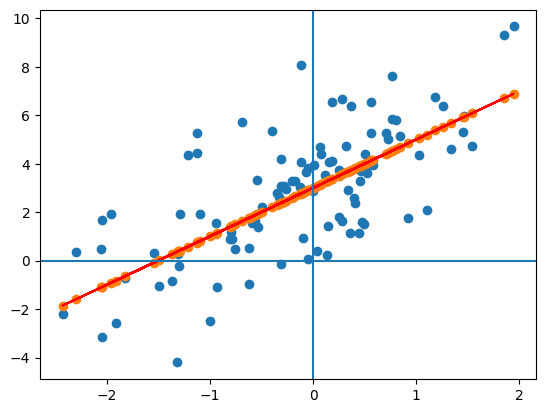

In [239]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m * X + q + noise * np.random.randn(N)

plt.scatter(X, Y)
plt.plot(X, m * X + q, color="red")
plt.scatter(X, m * X + q)
plt.axhline(0)
plt.axvline(0)

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem

$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$

and display the regression line superimposed to the noisy data and the exact model.


In [240]:
# I have to create a new matrix to represent the equation y = m*x + q:
# the coefficients of the m parameter are the random samples X, while the coefficients of the q parameter are all ones
PHI = np.block([X[:, np.newaxis], np.ones((N, 1))])
# Compute the least squares solution to find the optimal parameters
w_ls = my_pinv2(PHI) @ Y

m_ls = w_ls[0]
q_ls = w_ls[1]

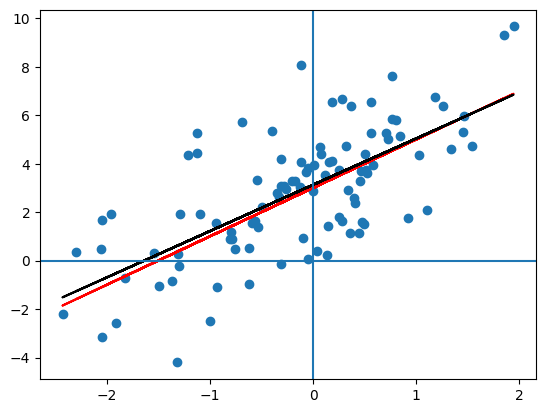

In [241]:
plt.scatter(X, Y)
plt.plot(X, m * X + q, color="red")
plt.plot(X, m_ls * X + q_ls, color="black")
plt.axhline(0)
plt.axvline(0)

Repeat the excercise by solving the normal equations. Compare the results


In [242]:
# Matrix of coefficients of the system of normal equations
Z = PHI.T @ PHI
# solve the system of normal equations
w_ne = np.linalg.solve(Z, PHI.T @ Y)

m_ne = w_ne[0]
q_ne = w_ne[1]

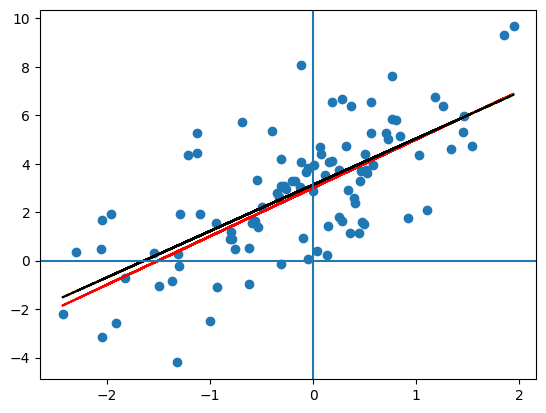

In [243]:
plt.scatter(X, Y)
plt.plot(X, m * X + q, color="red")
plt.plot(X, m_ne * X + q_ne, color="orange")
plt.plot(X, m_ls * X + q_ls, color="black", linestyle="dashed")
plt.axhline(0)
plt.axvline(0)

# Ridge regression and Kernel regression


Consider the function

$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.


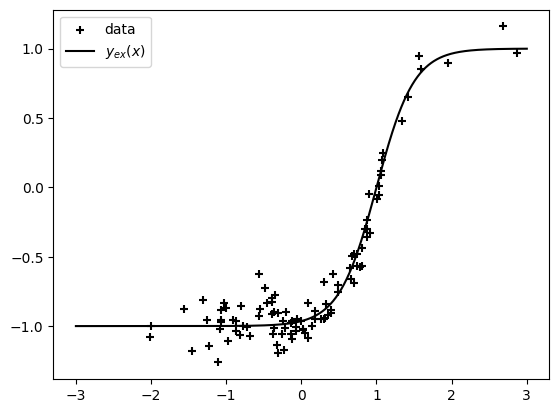

In [312]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2 * (x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3, 3, N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.


In [313]:
PHI = np.block([X[:, np.newaxis], np.ones((N, 1))])
w_ls = my_pinv2(PHI) @ Y

m_ls = w_ls[0]
q_ls = w_ls[1]

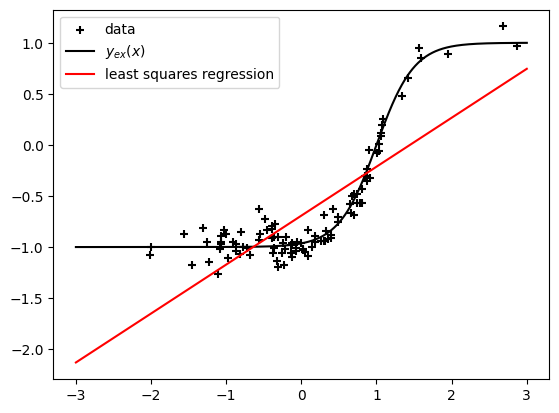

In [314]:
plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m_ls * X_test + q_ls, color="red", label="least squares regression")
plt.legend()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.


In [315]:
def ridge_inv(A, llambda):
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    s[s != 0] = s[s != 0] / (s[s != 0] ** 2 + llambda)
    return VT.T @ np.diag(s) @ U.T

In [324]:
llambda = 1.0
PHI = np.block([X[:, np.newaxis], np.ones((N, 1))])
w_ridge = ridge_inv(PHI, llambda) @ Y

m_ridge = w_ridge[0]
q_ridge = w_ridge[1]
m_ridge, q_ridge

(0.4730792123016404, -0.6853819412708239)

Or using the normal equations:


In [333]:
llambda = 1.0
PHI = np.block([X[:, np.newaxis], np.ones((N, 1))])
w_ridge_ne = np.linalg.solve(PHI.T @ PHI + llambda * np.eye(PHI.shape[1]), PHI.T @ Y)
w_ridge_ne  # same result!!

array([ 0.47307921, -0.68538194])

Or in another way


In [334]:
llambda = 1.0
PHI = np.block([X[:, np.newaxis], np.ones((N, 1))])
alpha = np.linalg.solve(PHI @ PHI.T + llambda * np.eye(PHI.shape[0]), Y)
w_ridge_ne = PHI.T @ alpha  # same result!!
w_ridge_ne

array([ 0.47307921, -0.68538194])

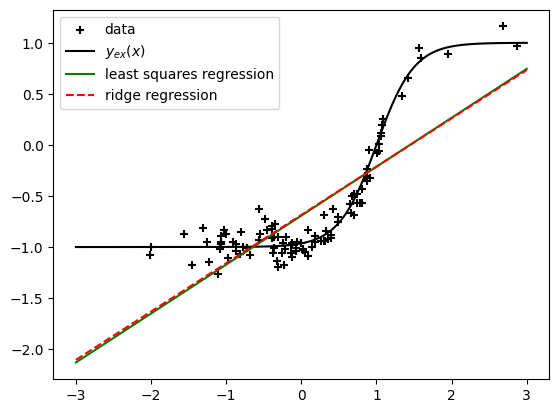

In [325]:
plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m_ls * X_test + q_ls, color="green", label="least squares regression")
plt.plot(
    X_test,
    m_ridge * X_test + q_ridge,
    color="red",
    linestyle="--",
    label="ridge regression",
)
plt.legend()

Consider now **kernel regression**.

1. Consider first the scalar product kernel
   $$K(x_i,x_j) = x_i x_j + 1.$$
   Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
   $$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
   $$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$


1. Consider first the scalar product kernel
   $$K(x_i,x_j) = x_i x_j + 1.$$
   Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?


In [340]:
def kernel1(xi, xj):
    return xi * xj + 1

In [354]:
kernel = kernel1

llambda = 1.0
K = np.array([[kernel(X[i], X[j]) for j in range(N)] for i in range(N)])
alpha_kernel = np.linalg.solve(K + llambda * np.eye(K.shape[0]), Y)
K_test = np.array([[kernel(X_test[i], X[j]) for j in range(N)] for i in range(N_test)])
Y_test_kernel1 = K_test @ alpha_kernel

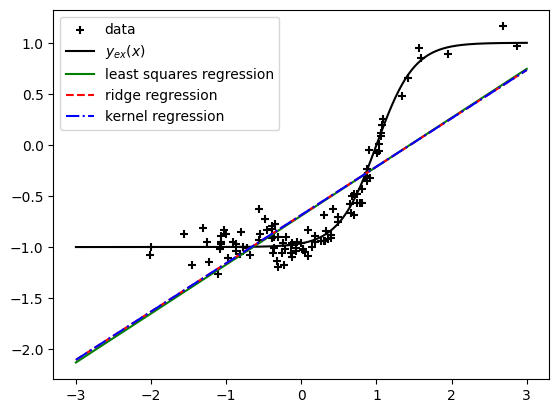

In [358]:
plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m_ls * X_test + q_ls, color="green", label="least squares regression")
plt.plot(
    X_test,
    m_ridge * X_test + q_ridge,
    color="red",
    linestyle="--",
    label="ridge regression",
)
plt.plot(
    X_test,
    Y_test_kernel1,
    color="blue",
    linestyle="-.",
    label="kernel regression",
)
plt.legend()

2. Consider then the higher-order scalar product kernel, for $q > 1$.
   $$K(x_i,x_j) = (x_i x_j + 1)^q.$$


In [362]:
def kernel2(xi, xj, q):
    return (xi * xj + 1) ** q

In [376]:
kernel = kernel2
q = 7
llambda = 1.0
K = np.array([[kernel(X[i], X[j], q) for j in range(N)] for i in range(N)])
alpha_kernel = np.linalg.solve(K + llambda * np.eye(K.shape[0]), Y)
K_test = np.array(
    [[kernel(X_test[i], X[j], q) for j in range(N)] for i in range(N_test)]
)
Y_test_kernel2 = K_test @ alpha_kernel

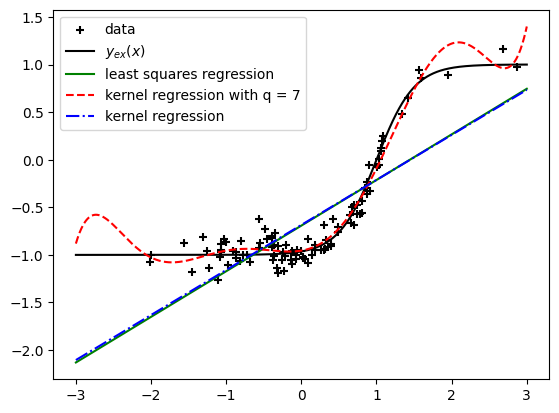

In [382]:
plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m_ls * X_test + q_ls, color="green", label="least squares regression")
plt.plot(
    X_test,
    Y_test_kernel2,
    color="red",
    linestyle="--",
    label="kernel regression with q = " + str(q),
)
plt.plot(
    X_test,
    Y_test_kernel1,
    color="blue",
    linestyle="-.",
    label="kernel regression",
)
plt.legend()

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
   $$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$


In [378]:
def kernel3(xi, xj, sigma):
    return np.exp(-((xi - xj) ** 2) / (2 * sigma**2))

In [391]:
kernel = kernel3
sigma = 0.76
llambda = 1.0
K = np.array([[kernel(X[i], X[j], sigma) for j in range(N)] for i in range(N)])
alpha_kernel = np.linalg.solve(K + llambda * np.eye(K.shape[0]), Y)
K_test = np.array(
    [[kernel(X_test[i], X[j], sigma) for j in range(N)] for i in range(N_test)]
)
Y_test_kernel3 = K_test @ alpha_kernel

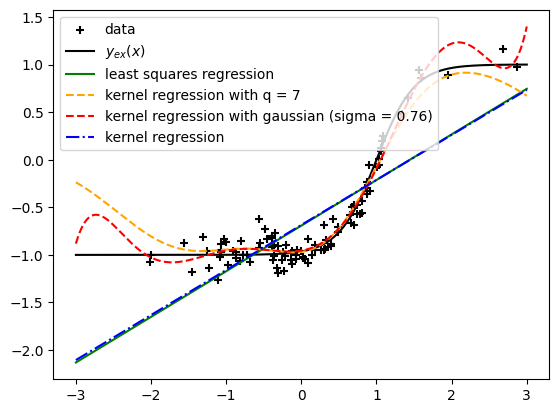

In [392]:
plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m_ls * X_test + q_ls, color="green", label="least squares regression")
plt.plot(
    X_test,
    Y_test_kernel3,
    color="orange",
    linestyle="--",
    label="kernel regression with q = " + str(q),
)
plt.plot(
    X_test,
    Y_test_kernel2,
    color="red",
    linestyle="--",
    label="kernel regression with gaussian (sigma = " + str(sigma) + ")",
)
plt.plot(
    X_test,
    Y_test_kernel1,
    color="blue",
    linestyle="-.",
    label="kernel regression",
)
plt.legend()